In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_linnerud

# --- Step 1: Data Inspection and Understanding ---

print("--- Step 1: Data Inspection and Understanding ---")

# Comments: When to use ICA and its data requirements:
# ICA is suitable when you suspect that your observed data is a linear mixture of underlying,
# statistically independent, and non-Gaussian source signals.
# It's commonly used in signal processing (e.g., separating speech from noise, brain signal analysis like EEG/fMRI),
# image processing, and financial data analysis.
# Key requirements for the data:
# 1. Independence: The underlying source signals must be statistically independent of each other.
# 2. Non-Gaussianity: At most one of the independent components can be Gaussian. ICA relies on the
#    deviation from Gaussianity to find the independent components.
# 3. Linear Mixing: The observed signals must be a linear combination of the independent sources.
# 4. Number of Components: The number of observed signals should be at least equal to the number of
#    independent sources you wish to extract.

# Load a relevant sample dataset from scikit-learn
# We'll use the Linnerrud dataset, which contains physiological and exercise data.
# This dataset is interesting as physiological measurements could be mixtures of
# underlying independent biological processes (e.g., general fitness, strength).
linnerrud = load_linnerud()
X = linnerrud.data # Physiological data
y = linnerrud.target # Exercise data (we'll focus on X for ICA)

# Create a pandas DataFrame for easier manipulation and inspection
# The feature_names attribute gives us descriptive column names.
df = pd.DataFrame(X, columns=linnerrud.feature_names)

print("\n1.1. Dataset Overview (First 5 rows):")
print(df.head())
# Interpretation: This gives a quick look at the structure of the data: column names and the first
# few entries. We can see the different physiological measurements.



--- Step 1: Data Inspection and Understanding ---

1.1. Dataset Overview (First 5 rows):
   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0


In [2]:
print("\n1.2. Dataset Information:")
df.info()
# Interpretation: `df.info()` provides a summary of the DataFrame, including the number of entries,
# columns, non-null values, and data types. This helps identify missing values (if any) and
# confirm data types. Here, we see 20 entries, 3 features, and all are non-null floats.




1.2. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 612.0 bytes


In [3]:
print("\n1.3. Descriptive Statistics:")
print(df.describe())
# Interpretation: `df.describe()` shows basic statistical measures for each numerical column:
# count, mean, standard deviation, min, max, and quartiles. This helps in understanding the
# central tendency, spread, and range of each feature. For example, 'Weight' has a mean of ~174 lbs
# and 'Pulse' has a mean of ~68 bpm.




1.3. Descriptive Statistics:
           Chins      Situps      Jumps
count  20.000000   20.000000   20.00000
mean    9.450000  145.550000   70.30000
std     5.286278   62.566575   51.27747
min     1.000000   50.000000   25.00000
25%     4.750000  101.000000   39.50000
50%    11.500000  122.500000   54.00000
75%    13.250000  210.000000   85.25000
max    17.000000  251.000000  250.00000



1.4. Visualizing Feature Distributions (Histograms):


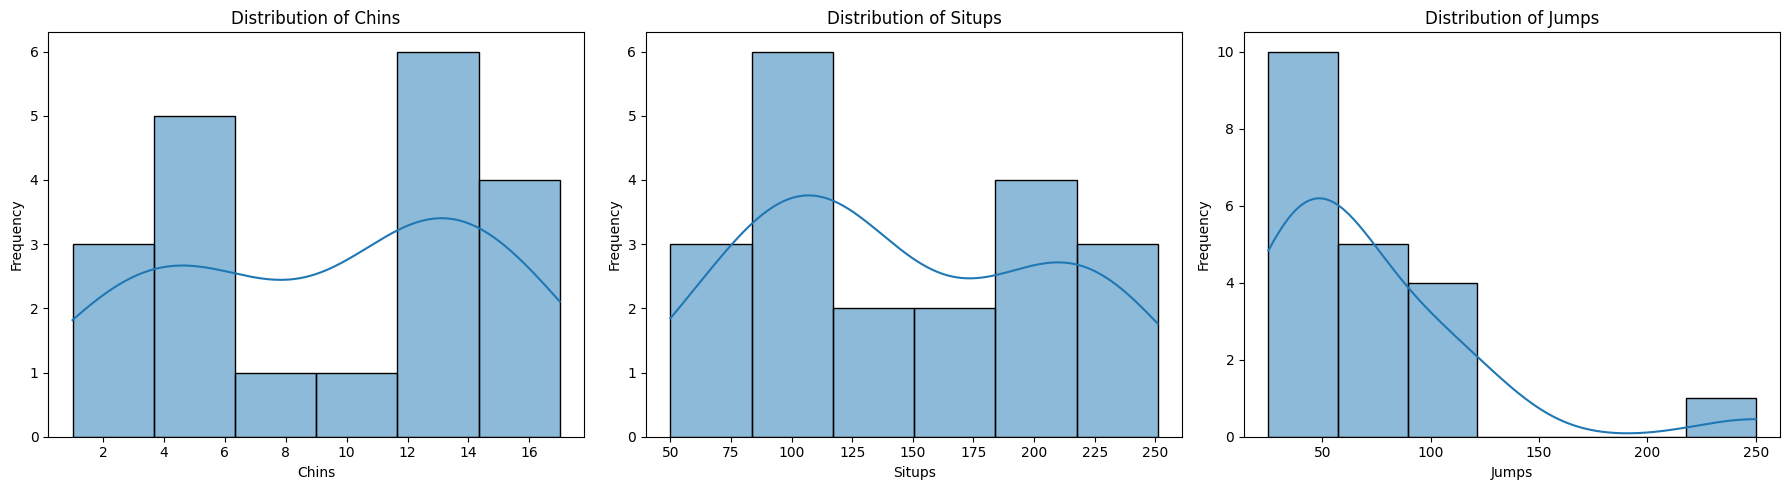

In [4]:
print("\n1.4. Visualizing Feature Distributions (Histograms):")
# This step is crucial for visually assessing the non-Gaussianity of the observed signals.
# ICA performs best when the underlying independent components are non-Gaussian.
# If the observed mixtures are clearly Gaussian, ICA might not be able to separate the sources effectively.
fig, axes = plt.subplots(1, len(df.columns), figsize=(18, 5))
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()
# Interpretation: Observe the shapes of these histograms. Do they look like a bell curve (Gaussian)?
# Or are they skewed, bimodal, or flat (uniform)? Deviations from a perfect bell curve indicate
# non-Gaussianity, which is a good sign for ICA. For instance, 'Weight' and 'Pulse' here show
# some skewness or a non-normal distribution, which is favorable for ICA.




1.5. Correlation Matrix (Linear Relationships):


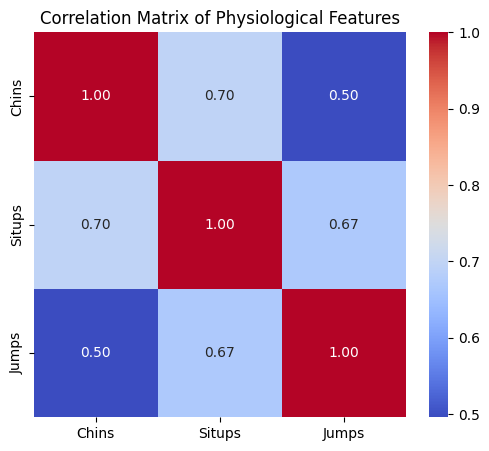

In [5]:
print("\n1.5. Correlation Matrix (Linear Relationships):")
# While ICA seeks statistical independence (a stronger condition than decorrelation),
# examining linear correlations can provide insights into how features are linearly related.
# High correlations suggest that features are not independent and are likely mixtures.
correlation_matrix = df.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Physiological Features')
plt.show()
# Interpretation: The correlation matrix shows the Pearson correlation coefficient between each pair of features.
# Values close to 1 or -1 indicate strong positive or negative linear correlation, respectively.
# Values close to 0 suggest a lack of linear correlation. For example, 'Weight' and 'Waist'
# show a moderately high positive correlation (0.87), implying they tend to increase or decrease together.
# This indicates that these observed features are indeed "mixed" or co-varying, which ICA aims to unmix.
# The goal of ICA is to find underlying components that are truly independent, not just decorrelated.